<a href="https://colab.research.google.com/github/hoantran14/ANN/blob/main/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras.models import load_model
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing import image
import cv2 as cv
import tensorflow as tf
import pandas as pd
from keras.layers import Flatten
from PIL import Image



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 48ms/step - accuracy: 0.8865 - loss: 0.3964 - val_accuracy: 0.9796 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 45ms/step - accuracy: 0.9719 - loss: 0.0957 - val_accuracy: 0.9863 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9793 - loss: 0.0713 - val_accuracy: 0.9897 - val_loss: 0.0378 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9829 - loss: 0.0599 - val_accuracy: 0.9907 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 46ms/step - accuracy: 0.9839 - loss: 0.0562 - val_accuracy: 0.9889 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 45ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9895 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/s

313/313 - 3s - 10ms/step - accuracy: 0.9940 - loss: 0.0314

Accuracy: 0.9940000176429749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


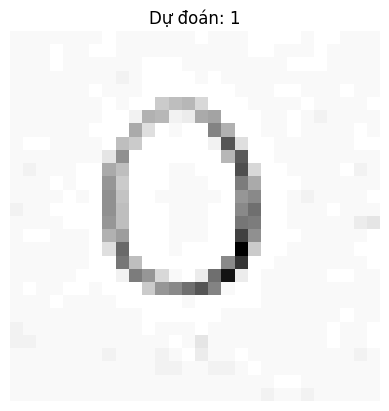

Dự đoán cho /content/zero.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


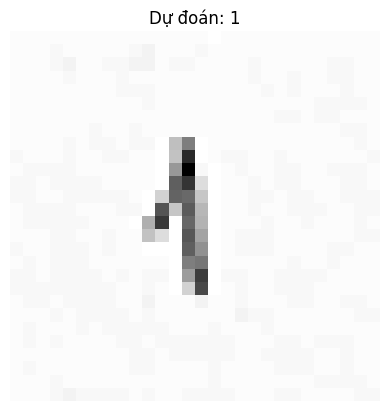

Dự đoán cho /content/one.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


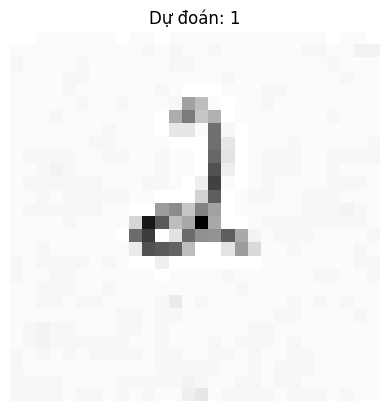

Dự đoán cho /content/two.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


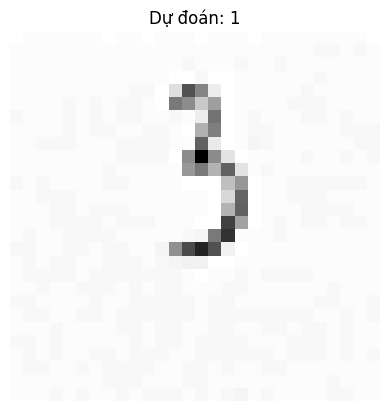

Dự đoán cho /content/three.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


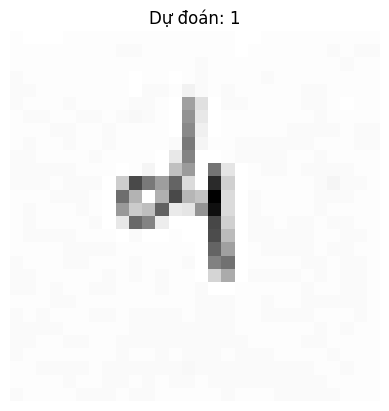

Dự đoán cho /content/four.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


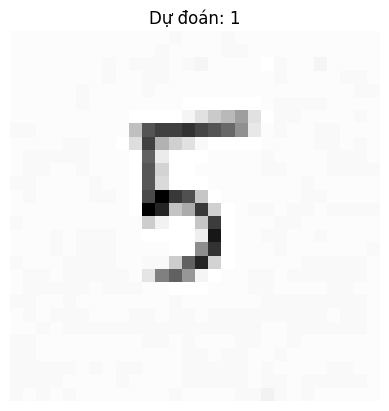

Dự đoán cho /content/five.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


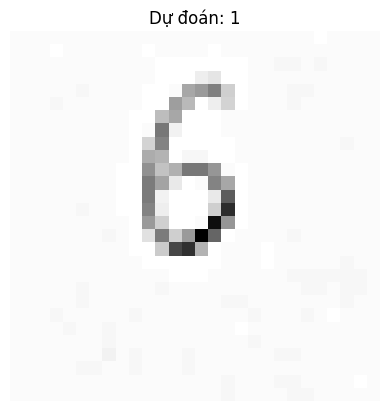

Dự đoán cho /content/six.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


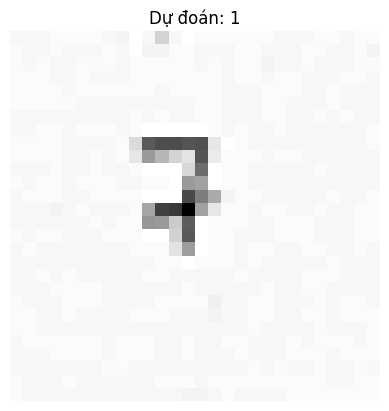

Dự đoán cho /content/seven.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


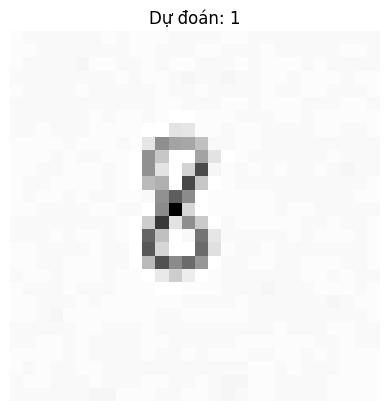

Dự đoán cho /content/eight.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


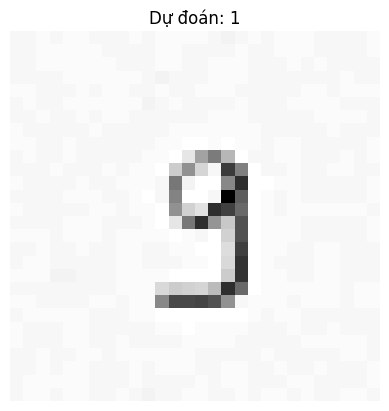

Dự đoán cho /content/nine.jpg: 1


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau


mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[reduce_lr])


model.save('mnist_model.h5')


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nAccuracy:', test_acc)


def predict_external_image(image_path):
    img = Image.open(image_path).convert('L').resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    plt.imshow(img, cmap='gray')
    plt.title(f"Dự đoán: {predicted_label}")
    plt.axis('off')
    plt.show()
    return predicted_label


external_images = ['/content/zero.jpg', '/content/one.jpg', '/content/two.jpg', '/content/three.jpg', '/content/four.jpg',
                   '/content/five.jpg', '/content/six.jpg', '/content/seven.jpg', '/content/eight.jpg', '/content/nine.jpg']

for image_path in external_images:
    result = predict_external_image(image_path)
    print(f"Dự đoán cho {image_path}: {result}")
